**找到常微分方程的解**
考虑简单的常微分方程

$$ \frac {dy}{dx} =1 ,y(0)=1 $$


In [1]:
#利用sympy来解ode
from sympy import symbols, Function,solve
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sympy import Function, dsolve, Derivative, symbols,lambdify

t = symbols('t')
y = Function('y')(t)

# 定义微分方程
ode = Derivative(y, t) - 1
# 初始条件
ics = {y.subs(t, 0): 0}
# 求解微分方程
sol = dsolve(ode,ics=ics)

print(sol)
# 将解析解转为可用于数值计算的函数
f = lambdify(t, sol.rhs, "numpy")

# 创建 x 的值
t_vals = np.linspace(0, 999, 1000)

# 计算对应的 y 的值
y_vals = f(t_vals)

print(y_vals)

Eq(y(t), t)
[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194.

**先从ode入手**
这里我们构造一些数据集
为了简化，变量如下 $$ t \in [0,10],dt=0.1$$ 暂时只涉及基础的ode，一阶导 y‘=c和y’=a+bt这样的常微分方程
构造的数据在一个batch是这样的：$$[ y_0(initial condition),t(variable)，y \prime(information of derivatation),y]$$
举个例子：$$[1,2,1,y] 表示 y_0=1,t=2时候，y\prime=1,label是y$$
$$[1,2,[1,1],y] 表示 y_0=1,t=2时候，y\prime=1+1*t，label是y$$
在这次的研究中，$$ 训练集的initial condition =0 $$
$$ c\in [1,10]，间隔1$$
$$ a\in [1,10],b\in [1,10],间隔0.1$$
$$ 测试集的initial condition =0 $$
$$ c\in [1,20]，间隔1$$
$$ a\in [1,10],b\in [1,10],间隔0.1$$


i 0
i 0
i 0
i 0
i 0
i 0
i 0
i 0
i 0
i 0
i 1
i 1
i 1
i 1
i 1
i 1
i 1
i 1
i 1
i 1
i 2
i 2
i 2
i 2
i 2
i 2
i 2
i 2
i 2
i 2
i 3
i 3
i 3
i 3
i 3
i 3
i 3
i 3
i 3
i 3
i 4
i 4
i 4
i 4
i 4
i 4
i 4
i 4
i 4
i 4
i 5
i 5
i 5
i 5
i 5
i 5
i 5
i 5
i 5
i 5
i 6
i 6
i 6
i 6
i 6
i 6
i 6
i 6
i 6
i 6
i 7
i 7
i 7
i 7
i 7
i 7
i 7
i 7
i 7
i 7
i 8
i 8
i 8
i 8
i 8
i 8
i 8
i 8
i 8
i 8
i 9
i 9
i 9
i 9
i 9
i 9
i 9
i 9
i 9
i 9
initial_conditions [{z1(0): -5, z2(0): -5}, {z1(0): -5, z2(0): -4}, {z1(0): -5, z2(0): -3}, {z1(0): -5, z2(0): -2}, {z1(0): -5, z2(0): -1}, {z1(0): -5, z2(0): 0}, {z1(0): -5, z2(0): 1}, {z1(0): -5, z2(0): 2}, {z1(0): -5, z2(0): 3}, {z1(0): -5, z2(0): 4}, {z1(0): -4, z2(0): -5}, {z1(0): -4, z2(0): -4}, {z1(0): -4, z2(0): -3}, {z1(0): -4, z2(0): -2}, {z1(0): -4, z2(0): -1}, {z1(0): -4, z2(0): 0}, {z1(0): -4, z2(0): 1}, {z1(0): -4, z2(0): 2}, {z1(0): -4, z2(0): 3}, {z1(0): -4, z2(0): 4}, {z1(0): -3, z2(0): -5}, {z1(0): -3, z2(0): -4}, {z1(0): -3, z2(0): -3}, {z1(0): -3, z2(0): -2}, {z1(0): -3, z2

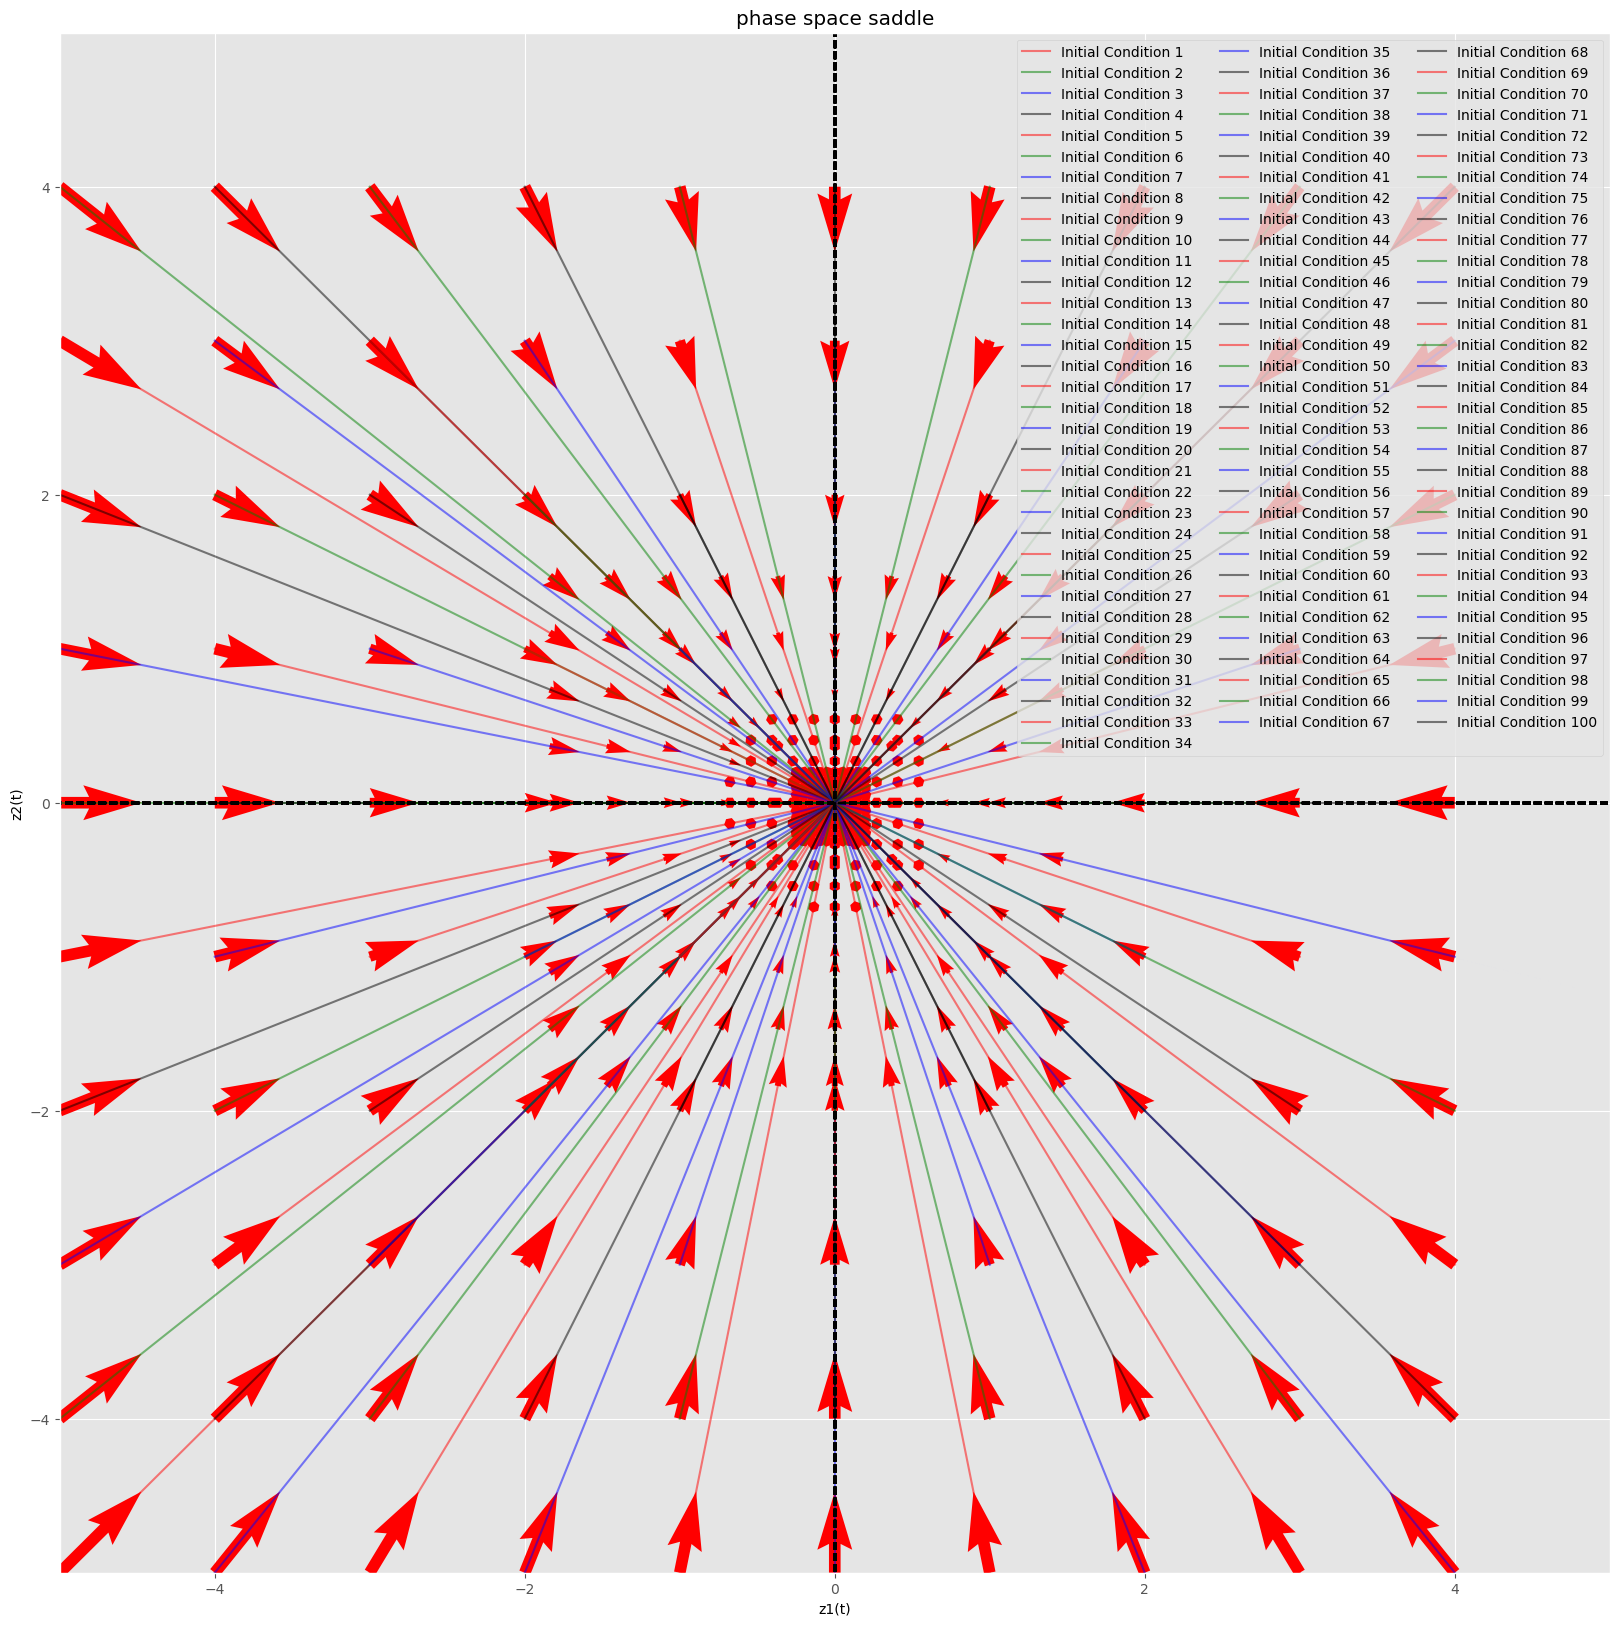

In [20]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# 定义符号变量和时间
t = sp.Symbol('t')
z1 = sp.Function('z1')(t)
z2 = sp.Function('z2')(t)

# 定义输入矩阵A
a_values = [  # 可以添加更多的矩阵
    [[-1,0], [0, -1]],  # A1
    [[-1, 0], [0, -2]],  # A2
]

# 定义状态空间模型
A = sp.Matrix(a_values[0])
state_space_model = A * sp.Matrix([z1, z2])

# 定义不同的初值条件
initial_conditions = [

]
# 计算z1和z2在给定时间范围内的数值

# 使用嵌套的循环生成两个变量的组合
for i in range(0,10):      # 变量1从-5到5
    for j in range(0,10):
        print("i",i)
        z1_ini_values=i-5
        z2_ini_values=j-5
        initial_conditions.append({z1.subs(t, 0): z1_ini_values,
                                   z2.subs(t, 0): z2_ini_values})
print("initial_conditions",initial_conditions)
# 创建图形窗口
plt.figure(figsize=(20, 20))
plt.style.use('ggplot')
line_shape=['r','g','b','k']
# 定义时间范围
time_range = np.linspace(0, 9, 10)

# 循环绘制不同初值条件下的相空间轨迹
for i, _ in enumerate(initial_conditions):

    ics=initial_conditions[i]
    #print("i====",ics)
    # 解析微分方程并添加当前初值条件
    solutions = sp.dsolve([z1.diff(t) - state_space_model[0],
                           z2.diff(t) - state_space_model[1]],
                           ics=ics)

    # 获取z1和z2的解析表达式
    z1_solution = solutions[0].rhs
    z2_solution = solutions[1].rhs
    print(z1_solution)

    # 用lambdify将解析表达式转换为可以进行数值计算的函数
    z1_func = sp.lambdify(t, z1_solution, modules=['numpy'],)
    z2_func = sp.lambdify(t, z2_solution, modules=['numpy'])

    z1_values=[]
    z2_values=[]
    for j in range(len(time_range)):
        z1_values.append(z1_func(time_range[j]))
        z2_values.append(z2_func(time_range[j]))
    print(z1_values)
    print(z2_values)

    # 画出相空间轨迹图
    plt.subplot(1,1,1)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    #加x 和y
    plt.plot([0,0],[-10,10],color='k',linestyle='--')
    plt.plot([-10,10],[0,0],color='k',linestyle='--')
    plt.plot(z1_values, z2_values,label=f'Initial Condition {i+1}',
             alpha=0.5,
             color=line_shape[i%4]
             )
    # 将列表转换为集合，然后计算差集
    difference_z1 = [x - y for x, y in zip(z1_values[1:], z1_values[:-1])]
    difference_z2 = [x - y for x, y in zip(z2_values[1:], z2_values[:-1])]

    # #画出向量场
    plt.quiver(z1_values[:-1], z2_values[:-1],
               difference_z1,
               difference_z2,
               scale_units='xy', angles='xy', scale=6, color='r')

# 添加图例和标签
plt.xlabel('z1(t)')
plt.ylabel('z2(t)')
plt.title('phase space'+' saddle')
plt.legend(loc='best',ncol=3)
plt.grid(True)
plt.show()

2数据集生成完毕
保存为tensor


In [1]:
import torch
train_data_tensor=torch.from_numpy(train_data)
test_data_tensor=torch.from_numpy(test_data)
#保存到.pt文件
torch.save(train_data_tensor,'./ode_dataset/train_data.pt')
torch.save(test_data_tensor,'./ode_dataset/test_data.pt')
print("save done")


NameError: name 'train_data' is not defined

/Users/liangaoming/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liangaoming/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27788 (\N{CJK UNIFIED IDEOGRAPH-6C8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liangaoming/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liangaoming/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/liangaoming/anaconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21449 (\N{CJK UNIFIED I

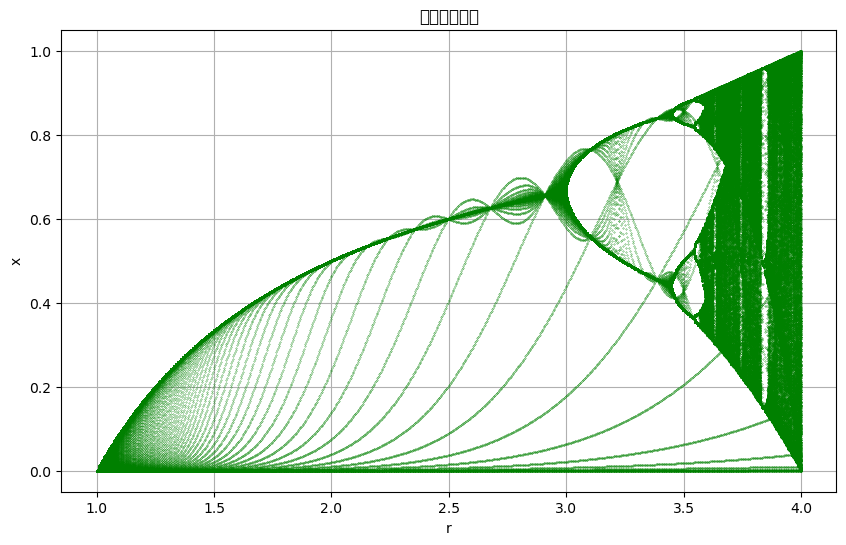

In [76]:

import numpy as np
import matplotlib.pyplot as plt

def logistic_map(x, r):
    return r * x * (1 - x)

def bifurcation_diagram(r_values, x0, iterations):
    x = np.zeros(iterations)

    for i in range(iterations):
        x0 = logistic_map(x0, r_values)
        x[i] = x0

    return x

# 定义参数范围和迭代次数
r_values = np.linspace(1, 4, 1000)
iterations = 1000

# 初始化初始条件
x0 =0.00001

# 生成混沌的分叉图
plt.figure(figsize=(10, 6))
for r in r_values:
    x = bifurcation_diagram(r, x0, iterations)
    r_values = np.full(iterations, r)
    plt.plot(r_values, x, 'g.', markersize=0.5)

plt.xlabel('r')
plt.ylabel('x')
plt.title('混沌的分叉图')
plt.grid(True)
plt.show()

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def van_der_pol(mu, x, dxdt):
    return -x - mu * (x**2 - 1) * dxdt

def runge_kutta_step(mu, x, dxdt, h):
    k1 = h * dxdt
    k2 = h * (dxdt + 0.5 * k1)
    k3 = h * (dxdt + 0.5 * k2)
    k4 = h * (dxdt + k3)
    return x + (k1 + 2 * k2 + 2 * k3 + k4) / 6.0

def runge_kutta_solve(mu, x0, dxdt0, h, num_steps):
    x_values = [x0]
    dxdt_values = [dxdt0]

    for _ in range(num_steps):
        dxdt = dxdt_values[-1]
        x = x_values[-1]
        dxdt_next = van_der_pol(mu, x, dxdt)
        x_next = runge_kutta_step(mu, x, dxdt_next, h)
        dxdt_values.append(dxdt_next)
        x_values.append(x_next)

    return np.array(x_values), np.array(dxdt_values)

# Parameters
mu = 2.0
x0 = 2.0
dxdt0 = 0.0
h = 0.01
num_steps = 5000

# Solve the Van der Pol equation using Runge-Kutta method
x_values, dxdt_values = runge_kutta_solve(mu, x0, dxdt0, h, num_steps)

# Plot the results
plt.plot(np.arange(0, num_steps + 1) * h, x_values)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Van der Pol Equation - Numerical Solution')
plt.grid(True)
plt.show()

SyntaxError: invalid syntax (1678379169.py, line 29)